# 条间收缩 

## 两面能量差

先确定两边能量差的阈值


In [1]:
TFile *ipf = new TFile("../data/shrink_16C.root", "read");
TTree *tree = (TTree*)ipf->Get("tree");
TCanvas *c1 = new TCanvas;
TH2F *h2se[3];
for (int i = 0; i != 3; ++i) {
    TString name;
    name.Form("h2d%dse", i+1);
    if (i==0) h2se[i] = new TH2F(name.Data(), name.Data(), 300, -150, 150, 400, 0, 8000);
    else h2se[i] = new TH2F(name.Data(), name.Data(), 200, -100, 100, 300, 0, 6000);
}

// data
Int_t xhit[3], yhit[3];
Double_t xe[3*32], ye[3*32];
// Int_t xe[3*32], ye[3*32];
Double_t sxe[3], sye[3];

for (int i = 0; i != 3; ++i) {
    tree->SetBranchAddress(TString::Format("d%dhit", i+1).Data(), xhit+i);
    tree->SetBranchAddress(TString::Format("d%dxe", i+1).Data(), xe+32*i);
    //tree->SetBranchAddress(TString::Format("d%dhit", i+1).Data(), yhit+i);
    tree->SetBranchAddress(TString::Format("d%dye", i+1).Data(), ye+32*i);
}

In [2]:
Long64_t nentry = tree->GetEntries();
for (Long64_t jentry = 0; jentry != nentry; ++jentry) {
    tree->GetEntry(jentry);
    for (int i = 0; i != 3; ++i) {
        sxe[i] = sye[i] = 0.0;
        for (int j = 0; j != xhit[i]; ++j) {
            sxe[i] += xe[32*i+j];
        }
        for (int j = 0; j != xhit[i]; ++j) {
            sye[i] += ye[32*i+j];
        }
        h2se[i]->Fill(sye[i]-sxe[i], sxe[i]);
    }
}

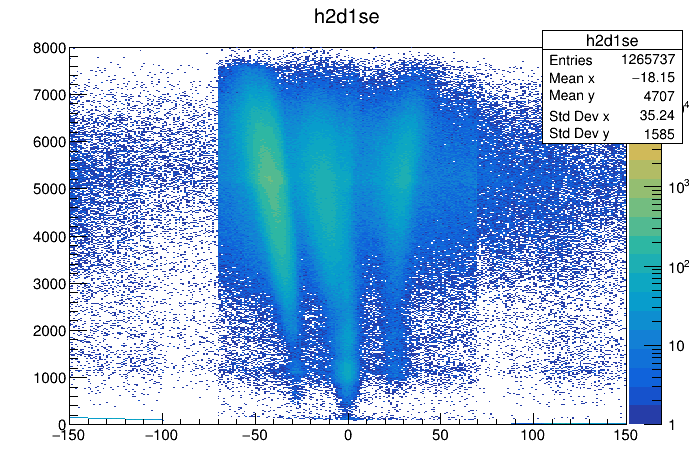

In [3]:
//%jsroot on
h2se[0]->Draw("colz");
c1->SetLogz();
c1->Draw();

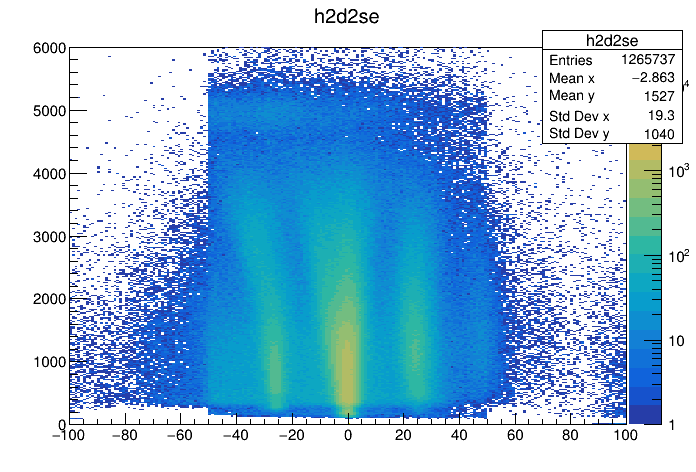

In [4]:
h2se[1]->Draw("colz");
c1->Draw();

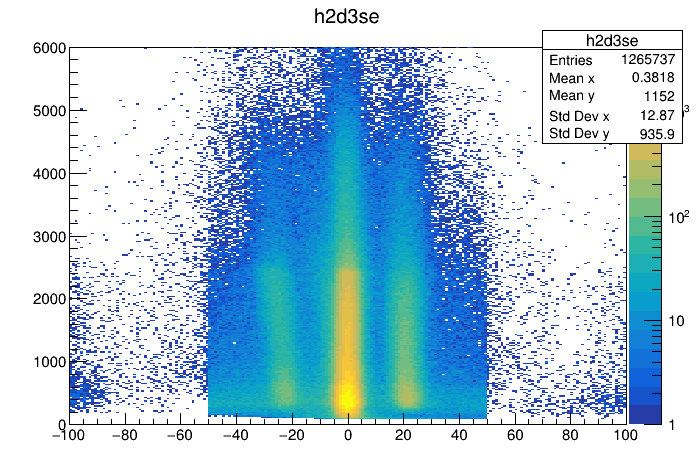

In [5]:
h2se[2]->Draw("colz");
c1->Draw();

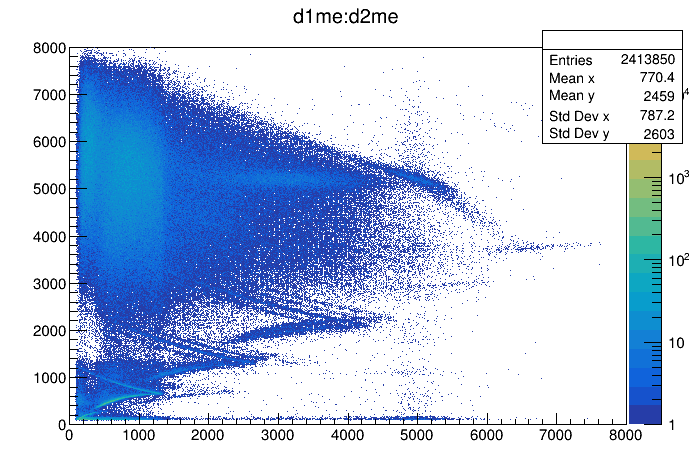

In [7]:
tree->Draw("d1me:d2me>>(1000, 0, 8000, 1000, 0, 8000)", "", "colz");
c1->Draw();

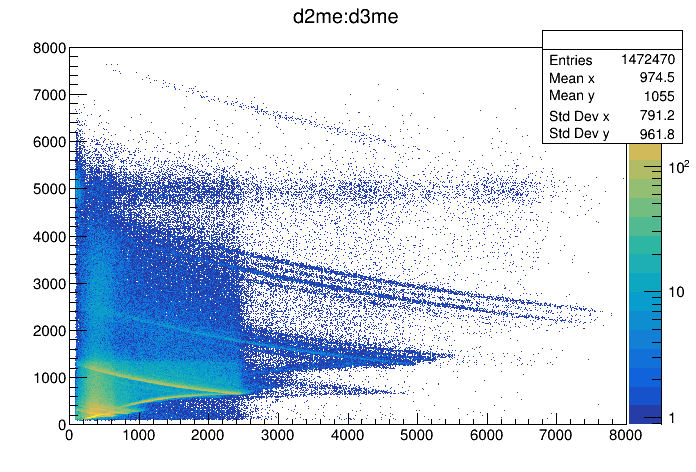

In [9]:
tree->Draw("d2me:d3me>>(1000, 0, 8000, 1000, 0, 8000)", "", "colz");
c1->Draw();